# Data Preparation 7

Dataframe treatment (outliers, feature extraction, ...)

In [8]:
import pandas as pd
from IPython.display import display
import numpy as np
import sqlite3
pd.options.display.max_columns = None
pd.options.display.max_rows = 200
import matplotlib.pyplot as plt
from pandas import DataFrame
import scipy.stats as stats
import pylab

In [9]:
admissions=pd.read_csv('MAIN_DF_6.csv')
admissions=admissions.drop(['Unnamed: 0'], axis=1)
admissions=admissions.reset_index(drop=True)
print(admissions.shape)
print('unique SUBJECT_ID:', admissions.SUBJECT_ID.nunique())
print('unique HADM_ID   :', admissions.HADM_ID.nunique())
print('unique ICUSTAY_ID:', admissions.ICUSTAY_ID.nunique())
admissions.head()

(51518, 65)
unique SUBJECT_ID: 37778
unique HADM_ID   : 48372
unique ICUSTAY_ID: 51518


,SUBJECT_ID,HADM_ID,ICUSTAY_ID,GENDER,AGE_AD,ADMITTIME,DISCHTIME,ADMISSION_TYPE,INSURANCE,ETHNICITY,DIAGNOSIS,DBSOURCE,FIRST_CAREUNIT,FIRST_WARDID,INTIME,OUTTIME,LOS,LOS_C,TIMEDELTA,TIMEDELTA_C,HOSPITAL_EXPIRE_FLAG,HEIGHT,WEIGHT,BMI,I_VEN,NI_VEN,227456_T,227456_V,225624_V,220615_V,220621_V,226537_V,225664_V,220545_V,226540_V,225668_V,220235_V,223830_V,220734_V,220274_V,227457_V,220224_V,220227_V,220645_V,226534_V,225690_V,220546_V,220739_V,223901_V,223900_V,223835_V,224688_V,224689_V,224690_V,220210_V,220277_V,220051_V,220052_V,220050_V,220045_V,220180_V,220181_V,220179_V,223761_V,224027_V
0,3,145834,211552,M,76.53,2101-10-20 19:08:00,2101-10-31 13:58:00,EMERGENCY,Medicare,WHITE,HYPOTENSION,carevue,MICU,12,2101-10-20 19:10:11,2101-10-26 20:43:09,6.0646,>4,10.78,>10,0,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,185777,294638,F,47.84,2191-03-16 00:28:00,2191-03-23 18:41:00,EMERGENCY,Private,WHITE,"FEVER,DEHYDRATION,FAILURE TO THRIVE",carevue,MICU,52,2191-03-16 00:29:31,2191-03-17 16:46:31,1.6785,1-2,7.76,6-10,0,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6,107064,228232,F,65.94,2175-05-30 07:15:00,2175-06-15 16:00:00,ELECTIVE,Medicare,WHITE,CHRONIC RENAL FAILURE/SDA,carevue,SICU,33,2175-05-30 21:30:54,2175-06-03 13:39:54,3.6729,2-4,16.36,>10,0,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,150750,220597,M,41.79,2149-11-09 13:06:00,2149-11-14 10:15:00,EMERGENCY,Medicaid,NW,HEMORRHAGIC CVA,carevue,MICU,15,2149-11-09 13:07:02,2149-11-14 20:52:14,5.3231,>4,4.88,3-6,1,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,194540,229441,F,50.15,2178-04-16 06:18:00,2178-05-11 19:00:00,EMERGENCY,Private,WHITE,BRAIN MASS,carevue,SICU,57,2178-04-16 06:19:32,2178-04-17 20:21:05,1.5844,1-2,25.53,>10,0,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#admissions['ggg']=pd.DatetimeIndex(admissions['ADMITTIME']) + pd.DateOffset(90)

In [11]:
print(admissions.NI_VEN.value_counts())
print(admissions.I_VEN.value_counts())

0    50574
1      944
Name: NI_VEN, dtype: int64
0    42842
1     8676
Name: I_VEN, dtype: int64


In [12]:
admissions.isnull().sum().sum()/(admissions.shape[0]*admissions.shape[1])

0.4385475427557807

In [13]:
a=admissions[admissions['DBSOURCE']=='carevue']
b=admissions[admissions['DBSOURCE']=='metavision']
print(a.isnull().sum().sum()/(admissions.shape[0]*admissions.shape[1]))
print(b.isnull().sum().sum()/(admissions.shape[0]*admissions.shape[1]))

0.3442602585504096
0.09378738424508835


In [14]:
admissions['DBSOURCE'].value_counts()

carevue       28350
metavision    23055
both            113
Name: DBSOURCE, dtype: int64

In [15]:
admissions=admissions[admissions['DBSOURCE']=='metavision']
admissions=admissions.drop(['DBSOURCE'], axis=1)
print(admissions.shape)

(23055, 64)


In [16]:
admissions.isnull().sum().sum()/(admissions.shape[0]*admissions.shape[1])

0.21284902949468662

In [17]:
print(admissions.NI_VEN.value_counts())
print(admissions.I_VEN.value_counts())

0    22120
1      935
Name: NI_VEN, dtype: int64
0    14413
1     8642
Name: I_VEN, dtype: int64


In [18]:
a=pd.to_datetime(admissions['INTIME'])-pd.to_datetime(admissions['ADMITTIME'])
admissions['PrevHospDays']=np.round(a.dt.total_seconds()/86400, 2)
admissions['PrevHospDays']=np.where(admissions['PrevHospDays']<0,0,admissions['PrevHospDays'])
print(admissions.shape)

(23055, 65)


mask...

In [19]:
admissions.isnull().sum()

SUBJECT_ID                  0
HADM_ID                     0
ICUSTAY_ID                  0
GENDER                      0
AGE_AD                      0
ADMITTIME                   0
DISCHTIME                   0
ADMISSION_TYPE              0
INSURANCE                   0
ETHNICITY                   0
DIAGNOSIS                   0
FIRST_CAREUNIT              0
FIRST_WARDID                0
INTIME                      0
OUTTIME                     0
LOS                         0
LOS_C                       0
TIMEDELTA                   0
TIMEDELTA_C                 0
HOSPITAL_EXPIRE_FLAG        0
HEIGHT                   8500
WEIGHT                    208
BMI                      8564
I_VEN                       0
NI_VEN                      0
227456_T                14548
227456_V                14548
225624_V                  719
220615_V                  722
220621_V                  768
226537_V                15888
225664_V                 5674
220545_V                  746
226540_V  

In [20]:
admissions['WEIGHT']=admissions['WEIGHT'].groupby(admissions['GENDER']).transform(lambda x: x.fillna(np.round(x.groupby(admissions['SUBJECT_ID']).mean().mean(),1)))
admissions['HEIGHT']=admissions['HEIGHT'].groupby(admissions['GENDER']).transform(lambda x: x.fillna(np.round(x.groupby(admissions['SUBJECT_ID']).mean().mean(),1)))

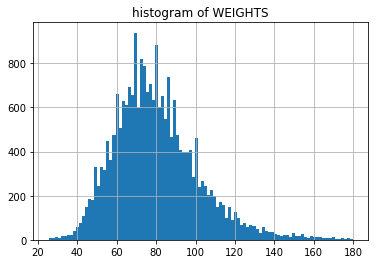

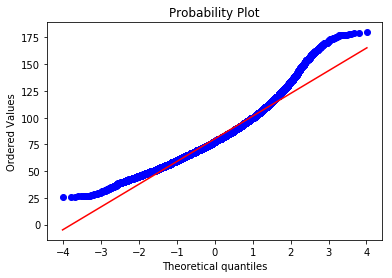

In [21]:
admissions['WEIGHT'].hist(bins=100)
plt.title('histogram of WEIGHTS')
plt.show()
stats.probplot(admissions['WEIGHT'], dist="norm", plot=pylab, rvalue=False)
pylab.show()

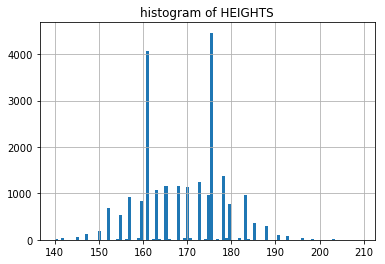

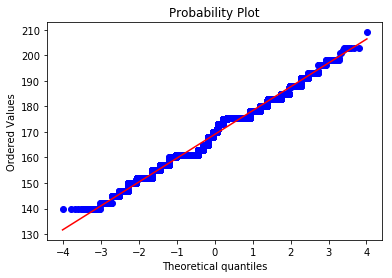

In [22]:
admissions['HEIGHT'].hist(bins=100)
plt.title('histogram of HEIGHTS')
plt.show()
stats.probplot(admissions['HEIGHT'], dist="norm", plot=pylab, rvalue=False)
pylab.show()

In [23]:
#admissions=admissions.drop(['HEIGHT_T', 'WEIGHT_T'], axis=1)
admissions['BMI'] = np.round((admissions['WEIGHT']/(admissions['HEIGHT']*admissions['HEIGHT']/10000)), 1)

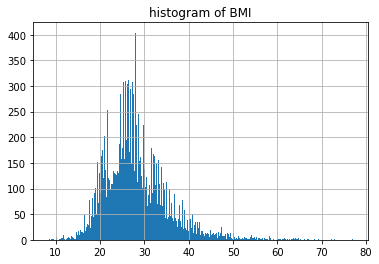

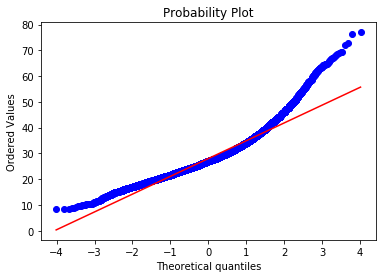

In [24]:
admissions['BMI'].hist(bins=500)
plt.title('histogram of BMI')
plt.show()
stats.probplot(admissions['BMI'], dist="norm", plot=pylab, rvalue=False)
pylab.show()

In [25]:
admissions.isnull().sum()

SUBJECT_ID                  0
HADM_ID                     0
ICUSTAY_ID                  0
GENDER                      0
AGE_AD                      0
ADMITTIME                   0
DISCHTIME                   0
ADMISSION_TYPE              0
INSURANCE                   0
ETHNICITY                   0
DIAGNOSIS                   0
FIRST_CAREUNIT              0
FIRST_WARDID                0
INTIME                      0
OUTTIME                     0
LOS                         0
LOS_C                       0
TIMEDELTA                   0
TIMEDELTA_C                 0
HOSPITAL_EXPIRE_FLAG        0
HEIGHT                      0
WEIGHT                      0
BMI                         0
I_VEN                       0
NI_VEN                      0
227456_T                14548
227456_V                14548
225624_V                  719
220615_V                  722
220621_V                  768
226537_V                15888
225664_V                 5674
220545_V                  746
226540_V  

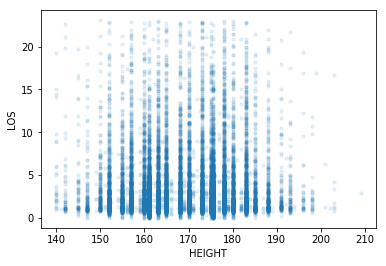

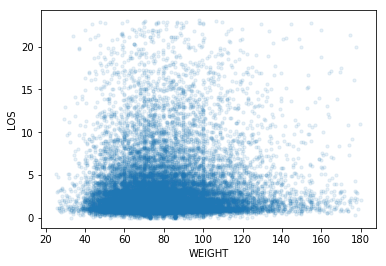

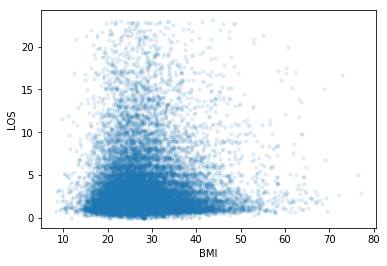

In [26]:
admissions.plot.scatter(x='HEIGHT',y='LOS',alpha=0.10, s=10)
#plt.xlim(6, 8)
plt.show()
admissions.plot.scatter(x='WEIGHT',y='LOS',alpha=0.10, s=10)
#plt.xlim(6, 8)
plt.show()
admissions.plot.scatter(x='BMI',y='LOS',alpha=0.10, s=10)
#plt.xlim(6, 8)
plt.show()

In [27]:
admissions=admissions.drop(['HEIGHT', 'WEIGHT'], axis=1)
print(admissions.shape)
admissions.head()

(23055, 63)


,SUBJECT_ID,HADM_ID,ICUSTAY_ID,GENDER,AGE_AD,ADMITTIME,DISCHTIME,ADMISSION_TYPE,INSURANCE,ETHNICITY,DIAGNOSIS,FIRST_CAREUNIT,FIRST_WARDID,INTIME,OUTTIME,LOS,LOS_C,TIMEDELTA,TIMEDELTA_C,HOSPITAL_EXPIRE_FLAG,BMI,I_VEN,NI_VEN,227456_T,227456_V,225624_V,220615_V,220621_V,226537_V,225664_V,220545_V,226540_V,225668_V,220235_V,223830_V,220734_V,220274_V,227457_V,220224_V,220227_V,220645_V,226534_V,225690_V,220546_V,220739_V,223901_V,223900_V,223835_V,224688_V,224689_V,224690_V,220210_V,220277_V,220051_V,220052_V,220050_V,220045_V,220180_V,220181_V,220179_V,223761_V,224027_V,PrevHospDays
16,23,124321,234044,M,75.26000,2157-10-18 19:34:00,2157-10-25 14:00:00,EMERGENCY,Medicare,WHITE,BRAIN MASS,SICU,57,2157-10-21 11:40:38,2157-10-22 16:08:48,1.1862,1-2,6.77,6-10,0,21.7,0,0,NaN,NaN,14.0,0.6,136.0,NaN,123.0,36.9,NaN,NaN,NaN,NaN,NaN,NaN,208.0,NaN,NaN,144.0,NaN,NaN,14.8,Spontaneously,Obeys Commands,Oriented,NaN,NaN,NaN,NaN,14.0,100.0,74.0,86.0,181.0,77.0,45.0,50.0,67.0,35.4,Warm,2.67
25,34,144319,290505,M,90.89934,2191-02-23 05:23:00,2191-02-25 20:20:00,EMERGENCY,Medicare,WHITE,BRADYCARDIA,CCU,7,2191-02-23 05:25:32,2191-02-24 19:24:10,1.5824,1-2,2.62,0-3,0,27.4,0,0,NaN,NaN,36.0,1.6,116.0,NaN,133.0,35.9,NaN,NaN,NaN,NaN,NaN,NaN,343.0,NaN,NaN,139.0,NaN,NaN,7.1,None,Localizes Pain,No Response-ETT,60.0,14.0,0.0,22.0,14.0,98.0,NaN,NaN,NaN,72.0,66.0,78.0,112.0,36.1,Warm,0.00
30,36,165660,241249,M,72.73000,2134-05-10 11:30:00,2134-05-20 13:16:00,ELECTIVE,Medicare,WHITE,VENTRAL HERNIA/SDA,MICU,52,2134-05-12 06:52:47,2134-05-16 15:14:20,4.3483,>4,10.07,>10,0,32.7,1,0,0.93,2.8,19.0,0.9,126.0,NaN,92.0,36.3,NaN,1.0,60.0,7.29,NaN,NaN,174.0,58.0,94.0,139.0,NaN,0.6,15.3,Spontaneously,Obeys Commands,Oriented,100.0,20.0,0.0,20.0,20.0,91.0,NaN,NaN,NaN,94.0,72.0,84.0,122.0,37.4,Warm,1.81
67,85,112077,291697,M,76.85000,2167-07-25 18:49:00,2167-07-30 15:24:00,EMERGENCY,Medicare,WHITE,PNEUMONIA,MICU,23,2167-07-25 18:50:37,2167-07-27 18:37:35,1.9909,1-2,4.86,3-6,0,31.8,0,0,NaN,NaN,17.0,1.4,114.0,NaN,NaN,26.4,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,NaN,137.0,NaN,NaN,8.3,Spontaneously,Obeys Commands,Oriented,NaN,NaN,NaN,NaN,39.0,99.0,NaN,NaN,NaN,136.0,87.0,99.0,166.0,37.0,Warm,0.00
87,107,182383,252542,M,69.66000,2121-11-30 19:24:00,2121-12-05 14:18:00,EMERGENCY,Medicare,NW,HYPERKALEMIA;CONGESTIVE HEART FAILURE,MICU,23,2121-11-30 19:24:56,2121-12-01 21:20:57,1.0806,1-2,4.79,3-6,0,31.3,0,0,NaN,NaN,36.0,5.8,125.0,NaN,110.0,40.3,NaN,NaN,NaN,NaN,NaN,NaN,303.0,NaN,NaN,139.0,NaN,NaN,14.2,Spontaneously,Obeys Commands,Oriented,NaN,NaN,NaN,NaN,19.0,97.0,NaN,NaN,NaN,64.0,67.0,88.0,155.0,36.7,Warm,0.00


In [28]:
admissions.isnull().sum()

SUBJECT_ID                  0
HADM_ID                     0
ICUSTAY_ID                  0
GENDER                      0
AGE_AD                      0
ADMITTIME                   0
DISCHTIME                   0
ADMISSION_TYPE              0
INSURANCE                   0
ETHNICITY                   0
DIAGNOSIS                   0
FIRST_CAREUNIT              0
FIRST_WARDID                0
INTIME                      0
OUTTIME                     0
LOS                         0
LOS_C                       0
TIMEDELTA                   0
TIMEDELTA_C                 0
HOSPITAL_EXPIRE_FLAG        0
BMI                         0
I_VEN                       0
NI_VEN                      0
227456_T                14548
227456_V                14548
225624_V                  719
220615_V                  722
220621_V                  768
226537_V                15888
225664_V                 5674
220545_V                  746
226540_V                17907
225668_V                10719
220235_V  

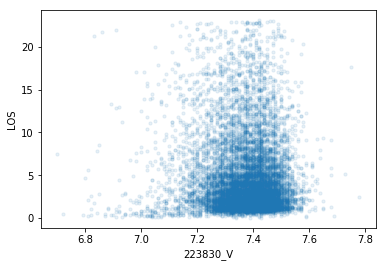

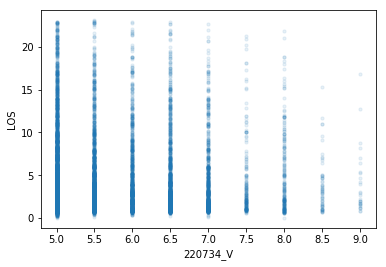

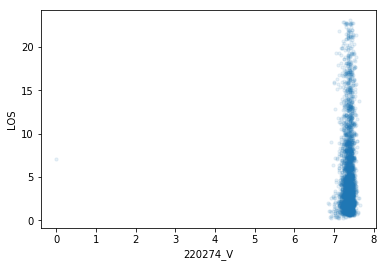

In [29]:
admissions.plot.scatter(x='223830_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(6, 8)
plt.show()
admissions.plot.scatter(x='220734_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(6, 8)
plt.show()
admissions.plot.scatter(x='220274_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(6, 8)
plt.show()

In [30]:
#admissions['220274_V']=admissions['220274_V'].mask(admissions['220274_V'].sub(admissions['220274_V'].median()).
#                                               div(admissions['220274_V'].std()).abs().gt(5))

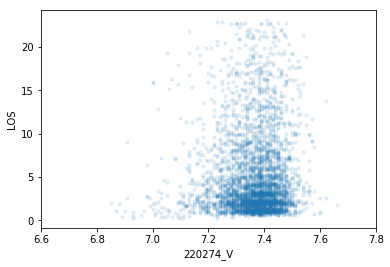

In [31]:
admissions.plot.scatter(x='220274_V',y='LOS',alpha=0.10, s=10)
plt.xlim(6.6, 7.8)
plt.show()

In [32]:
admissions=admissions.drop(['220274_V'], axis=1)
admissions.shape

(23055, 62)

In [33]:
admissions.isnull().sum()

SUBJECT_ID                  0
HADM_ID                     0
ICUSTAY_ID                  0
GENDER                      0
AGE_AD                      0
ADMITTIME                   0
DISCHTIME                   0
ADMISSION_TYPE              0
INSURANCE                   0
ETHNICITY                   0
DIAGNOSIS                   0
FIRST_CAREUNIT              0
FIRST_WARDID                0
INTIME                      0
OUTTIME                     0
LOS                         0
LOS_C                       0
TIMEDELTA                   0
TIMEDELTA_C                 0
HOSPITAL_EXPIRE_FLAG        0
BMI                         0
I_VEN                       0
NI_VEN                      0
227456_T                14548
227456_V                14548
225624_V                  719
220615_V                  722
220621_V                  768
226537_V                15888
225664_V                 5674
220545_V                  746
226540_V                17907
225668_V                10719
220235_V  

In [34]:
admissions=admissions.drop(['227456_T'], axis=1)

In [35]:
admissions.shape

(23055, 61)

In [36]:
admissions.to_csv('MAIN_DF_7.csv')